In [ ]:
import os
import sklearn
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from xgboost import XGBRegressor
from skopt.space import Real, Integer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error

In [217]:
data = pd.read_csv('C:/Users/hp/Documents/FYP_V0.2/cleaned_discharge/combined_standardized_discharge.csv')
data.to_csv('data.csv', index=False)

In [218]:
data.shape

(1251, 14)

In [219]:
data.describe()

,Cycle,Fade_percentage,Current_capacity,Nominal_capacity,SOH,Capacity,Ambient_temperature,Voltage_mean,Voltage_max,Temperature_mean,Temperature_max,Time_at_max_temp,Discharge_duration
count,1251.000000,1251.000000,1251.000000,1251.0,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000
mean,83.024780,25.883293,1.482334,2.0,0.436869,0.436869,18.964029,0.522170,0.575790,0.489753,0.535943,0.464433,2922.221988
std,50.126067,4.923329,0.098467,0.0,0.272801,0.272801,8.684394,0.270516,0.247367,0.243795,0.255585,0.268705,309.809435
min,1.000000,20.000000,1.400000,2.0,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2295.109000
25%,41.000000,20.000000,1.400000,2.0,0.206600,0.206600,4.000000,0.296600,0.385300,0.306500,0.342200,0.227850,2752.383000
50%,77.000000,30.000000,1.400000,2.0,0.402200,0.402200,24.000000,0.526700,0.562100,0.484500,0.569900,0.451800,2998.125000
75%,119.000000,30.000000,1.600000,2.0,0.653700,0.653700,24.000000,0.742550,0.793250,0.670050,0.735700,0.678250,3151.047000
max,197.000000,30.000000,1.600000,2.0,1.000000,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3690.234000


In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Battery              1251 non-null   object 
 1   Cycle                1251 non-null   int64  
 2   Fade_percentage      1251 non-null   int64  
 3   Current_capacity     1251 non-null   float64
 4   Nominal_capacity     1251 non-null   int64  
 5   SOH                  1251 non-null   float64
 6   Capacity             1251 non-null   float64
 7   Ambient_temperature  1251 non-null   int64  
 8   Voltage_mean         1251 non-null   float64
 9   Voltage_max          1251 non-null   float64
 10  Temperature_mean     1251 non-null   float64
 11  Temperature_max      1251 non-null   float64
 12  Time_at_max_temp     1251 non-null   float64
 13  Discharge_duration   1251 non-null   float64
dtypes: float64(9), int64(4), object(1)
memory usage: 137.0+ KB


In [208]:
features = ['Cycle', 'Voltage_mean', 'Temperature_max','Time_at_max_temp', 'Discharge_duration']
X = data[features]
y = data['SOH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [221]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns)
print(mi_series.sort_values(ascending=False))


Time_at_max_temp      1.667793
Discharge_duration    1.258690
Cycle                 0.761486
Voltage_mean          0.428685
Temperature_max       0.214244
dtype: float64


In [3]:
data = pd.read_csv('data.csv')

X_test = pd.read_csv('X_test.csv')
X_train = pd.read_csv('X_train.csv')
y_test = pd.read_csv('y_test.csv')
y_train = pd.read_csv('y_train.csv')

In [109]:
print("Data shape",data.shape,"\n")
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

Data shape (1251, 14) 

X_train shape (1000, 5)
y_train shape (1000, 1)
X_test shape (251, 5)
y_test shape (251, 1)


In [223]:
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [110]:
xgb_model.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)>

In [ ]:
xgb_model = xgb.XGBRegressor()
eval_set = [(X_train, y_train), (X_test, y_test)] 
xgb_model.fit(X_train, y_train, eval_set=eval_set)

y_pred_xgb = xgb_model.predict(X_test)

[0]	validation_0-rmse:0.19708	validation_1-rmse:0.19959
[1]	validation_0-rmse:0.14465	validation_1-rmse:0.14844
[2]	validation_0-rmse:0.10765	validation_1-rmse:0.11457
[3]	validation_0-rmse:0.08190	validation_1-rmse:0.09148
[4]	validation_0-rmse:0.06387	validation_1-rmse:0.07854
[5]	validation_0-rmse:0.05155	validation_1-rmse:0.07028
[6]	validation_0-rmse:0.04339	validation_1-rmse:0.06445
[7]	validation_0-rmse:0.03735	validation_1-rmse:0.06095
[8]	validation_0-rmse:0.03351	validation_1-rmse:0.05982
[9]	validation_0-rmse:0.03019	validation_1-rmse:0.05851
[10]	validation_0-rmse:0.02843	validation_1-rmse:0.05746
[11]	validation_0-rmse:0.02689	validation_1-rmse:0.05682
[12]	validation_0-rmse:0.02486	validation_1-rmse:0.05596
[13]	validation_0-rmse:0.02357	validation_1-rmse:0.05603
[14]	validation_0-rmse:0.02275	validation_1-rmse:0.05584
[15]	validation_0-rmse:0.02225	validation_1-rmse:0.05561
[16]	validation_0-rmse:0.02088	validation_1-rmse:0.05539
[17]	validation_0-rmse:0.01976	validation

In [6]:
# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)

print(f'MAE: {mae_xgb:.6f}')
print(f'MSE: {mse_xgb:.6f}')
print(f'RMSE: {rmse_xgb:.6f}')

MAE: 0.032216
MSE: 0.002778
RMSE: 0.052705


In [7]:
y_test_flat = y_test.values.flatten()
y_pred_xgb_flat = y_pred_xgb.flatten()

# Create a DataFrame to hold actual and predicted values
results_xgb = pd.DataFrame({'Actual SOH': y_test_flat, 'Predicted SOH': y_pred_xgb_flat.round(4)})

# Print the actual and predicted SOH values
print(results_xgb)

     Actual SOH  Predicted SOH
0        0.1231         0.1481
1        0.3744         0.3692
2        0.1782         0.1035
3        0.4869         0.5355
4        0.3438         0.3684
..          ...            ...
246      0.7323         0.7788
247      0.2741         0.2274
248      0.2306         0.2266
249      0.1856         0.2098
250      0.2840         0.2643

[251 rows x 2 columns]


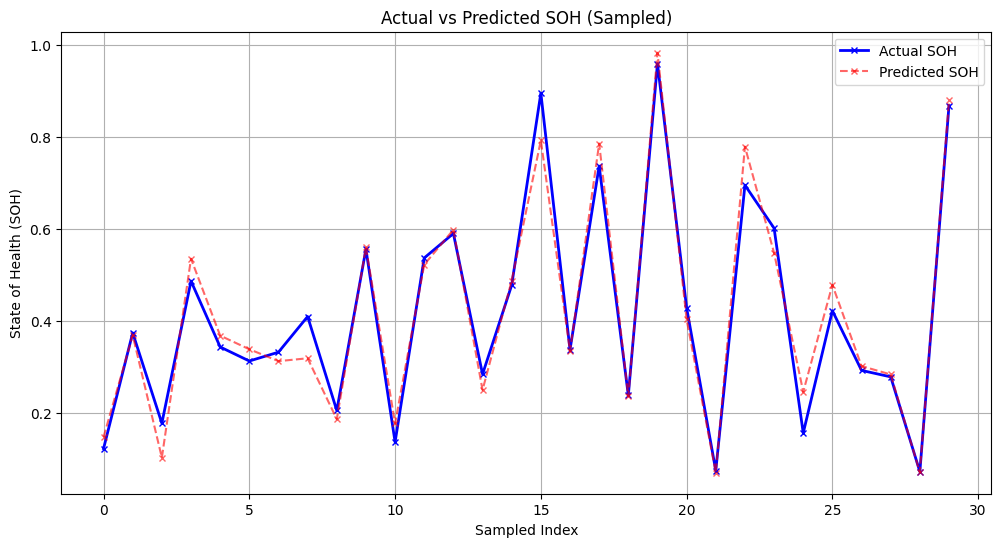

In [8]:
# Sample data for clearer visualization if the dataset is large
sample_size = 30  # adjust sample size as needed
y_test_sample = y_test[:sample_size]
y_pred_sample = y_pred_xgb[:sample_size]

# Plot actual and predicted SOH with transparency and markers
plt.figure(figsize=(12, 6))
plt.plot(y_test_sample.values, label='Actual SOH', color='blue',marker='x', markersize=5, linewidth=2)
plt.plot(y_pred_sample, label='Predicted SOH', color='red', linestyle='--', marker='x', markersize=5, alpha=0.6)
plt.title('Actual vs Predicted SOH (Sampled)')
plt.xlabel('Sampled Index')
plt.ylabel('State of Health (SOH)')
plt.legend()
plt.grid(True)
plt.show()

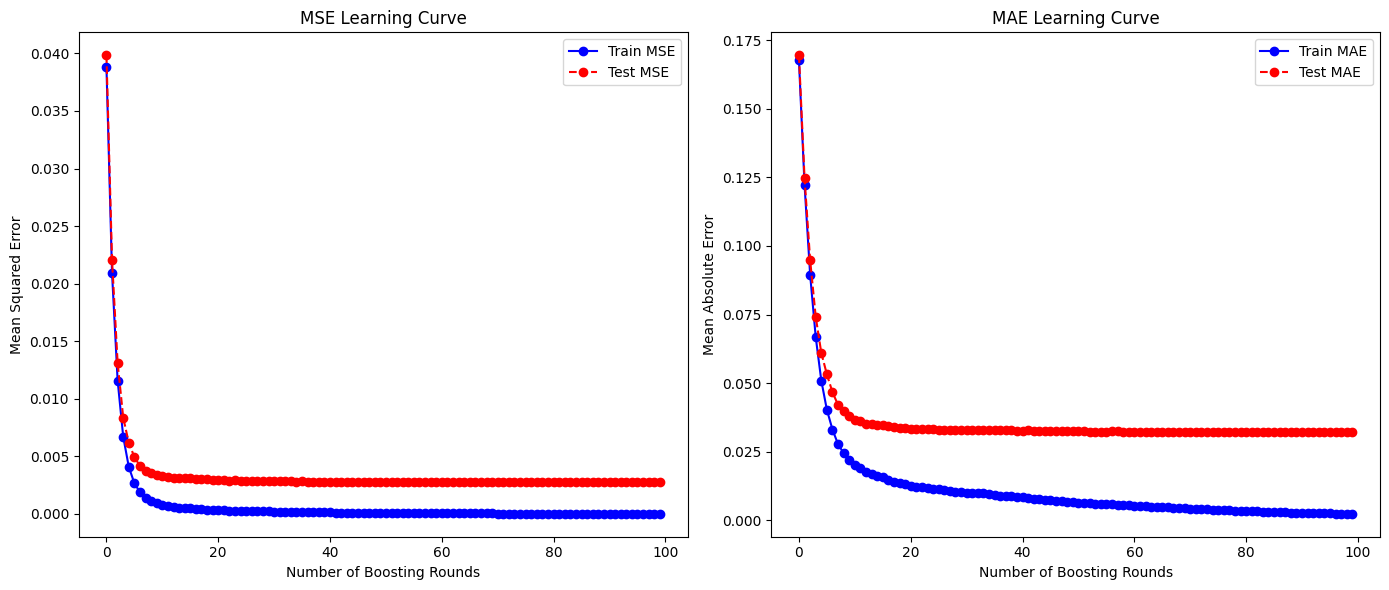

In [9]:
# Extract learning curve data
results = xgb_model.evals_result()
train_rmse = results["validation_0"]["rmse"]
test_rmse = results["validation_1"]["rmse"]

# Initialize lists to store MAE and MSE values
train_mae = []
test_mae = []
train_mse = []
test_mse = []

# Loop through each boosting round to calculate MAE and MSE at each step
for i in range(1, len(train_rmse) + 1):
    y_pred_train = xgb_model.predict(X_train, iteration_range=(0, i))
    y_pred_test = xgb_model.predict(X_test, iteration_range=(0, i))
    
    # Calculate MAE and MSE for train and test sets at the current boosting round
    train_mae.append(mean_absolute_error(y_train, y_pred_train))
    test_mae.append(mean_absolute_error(y_test, y_pred_test))
    train_mse.append(mean_squared_error(y_train, y_pred_train))
    test_mse.append(mean_squared_error(y_test, y_pred_test))

# Plot the learning curves
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# MSE Learning Curve
ax[0].plot(train_mse, label="Train MSE", marker="o", color="blue")
ax[0].plot(test_mse, label="Test MSE", marker="o", color="red", linestyle="--")
ax[0].set_title("MSE Learning Curve")
ax[0].set_xlabel("Number of Boosting Rounds")
ax[0].set_ylabel("Mean Squared Error")
ax[0].legend()

# MAE Learning Curve
ax[1].plot(train_mae, label="Train MAE", marker="o", color="blue")
ax[1].plot(test_mae, label="Test MAE", marker="o", color="red", linestyle="--")
ax[1].set_title("MAE Learning Curve")
ax[1].set_xlabel("Number of Boosting Rounds")
ax[1].set_ylabel("Mean Absolute Error")
ax[1].legend()

# Plotting options
plt.tight_layout()
plt.show()

**# Hyperparameter Tuning**

In [134]:
param_space = {
    'learning_rate': Real(0.01, 0.2, prior='uniform'),  # Learning rate
    'max_depth': Integer(3, 10),                          # Max depth of trees
    'subsample': Real(0.5, 1.0, prior='uniform'),         # Fraction of samples used for fitting
    'colsample_bytree': Real(0.5, 1.0, prior='uniform'),  # Fraction of features used for fitting
    'gamma': Real(0, 0.02, prior='uniform'),                 # Regularization term
    'max_leaves': Integer(10, 100),                         # Max number of leaves
    'min_child_weight': Integer(0, 10, prior='uniform')    # Minimum sum of instance weight needed in a child
}

xgb_model = xgb.XGBRegressor()   
bayes_search_xgb = BayesSearchCV(xgb_model, param_space, n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)
bayes_search_xgb .fit(X_train, y_train, eval_set=[(X_test, y_test)])

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

BayesSearchCV(cv=3,
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                             'learning_rate': Real(low=0.01, high=0.2, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'max_leaves': Integer(low=10, high=100, prior='uniform', transform='normalize'),
                             'min_child_weight': Integer(low=0, high=10, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')},
              verbose=2)

In [135]:
# Get the best hyperparameters
best_params = bayes_search_xgb.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: OrderedDict([('colsample_bytree', 1.0), ('gamma', 0.0), ('learning_rate', 0.1678849734966332), ('max_depth', 10), ('max_leaves', 100), ('min_child_weight', 10), ('subsample', 0.7155544737095174)])


In [136]:
eval_set = [(X_train, y_train), (X_test, y_test)] 

best_xgb_model = xgb.XGBRegressor(**bayes_search_xgb .best_params_, random_state=42)
best_xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

y_pred_xgb = best_xgb_model.predict(X_test)

In [137]:
mae_best_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_best_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_best_xgb = root_mean_squared_error(y_test, y_pred_xgb)

print(f'MAE: {mae_best_xgb:.6f}')
print(f'MSE: {mse_best_xgb:.6f}')
print(f'RMSE: {rmse_best_xgb:.6f}')

MAE: 0.033561
MSE: 0.002564
RMSE: 0.050636


In [138]:
best_xgb_model.save_model("best_xgb_model.json")

In [97]:
y_test_flat = y_test.values.flatten()
y_pred_xgb_flat = y_pred_xgb.flatten()

# Create a DataFrame to hold actual and predicted values
results_xgb = pd.DataFrame({'Actual SOH': y_test_flat, 'Predicted SOH': y_pred_xgb_flat.round(4)})

# Print the actual and predicted SOH values
print(results_xgb)

     Actual SOH  Predicted SOH
0        0.1231         0.0970
1        0.3744         0.3451
2        0.1782         0.0566
3        0.4869         0.5496
4        0.3438         0.3618
..          ...            ...
246      0.7323         0.7514
247      0.2741         0.2275
248      0.2306         0.2354
249      0.1856         0.1858
250      0.2840         0.2848

[251 rows x 2 columns]


In [145]:
import pandas as pd

# Flatten the target and prediction arrays
y_test_flat = y_test.values.flatten()
y_pred_xgb_flat = y_pred_xgb.flatten()

# Use only the test feature set
X_test_flat = X_test.copy()

# Create the final DataFrame with test data only
results_test = X_test_flat.copy()
results_test['Actual SOH'] = y_test_flat
results_test['Predicted SOH'] = y_pred_xgb_flat.round(4)

# Save the DataFrame to a CSV file
results_test.to_csv('C:/Users/hp/Documents/FYP_V0.2/cleaned_discharge/test_soh_predictions.csv', index=False)

# Print the DataFrame (optional)
print(results_test)


     Cycle  Voltage_mean  Temperature_max  Time_at_max_temp  \
0      145        0.6436           0.5278            0.0885   
1       92        0.6100           0.5862            0.6411   
2       95        0.1031           0.8080            0.4584   
3      162        0.5896           0.7745            0.4920   
4       39        0.6111           0.7656            0.5275   
..     ...           ...              ...               ...   
246     49        0.5101           0.6310            0.7825   
247    169        0.4377           0.8376            0.2162   
248    118        0.2854           0.9102            0.2271   
249     94        0.7141           0.5995            0.2182   
250    150        0.2739           0.4218            0.2854   

     Discharge_duration  Actual SOH  Predicted SOH  
0              2964.750      0.1231         0.0970  
1              2458.812      0.3744         0.3451  
2              2392.375      0.1782         0.0566  
3              3037.875      0.

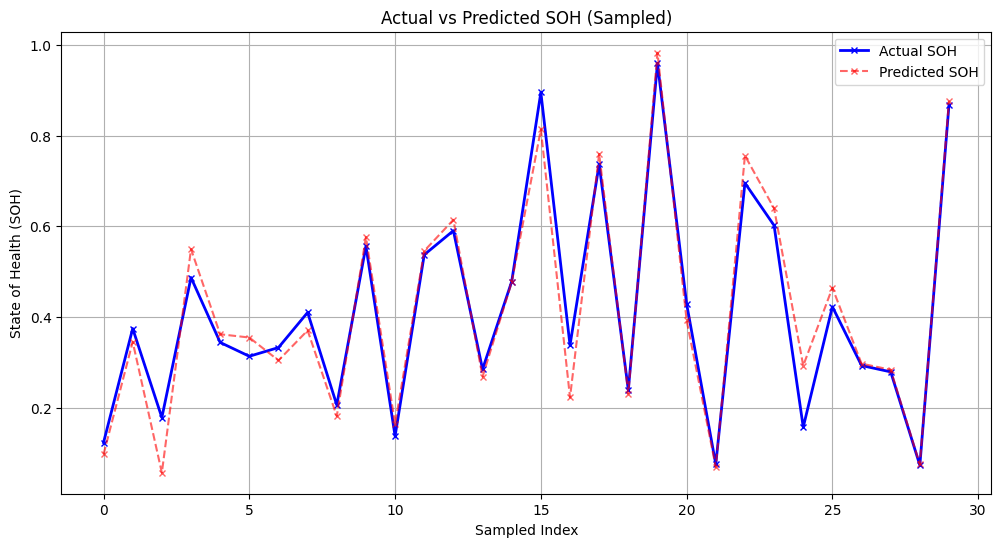

In [98]:
# Sample data for clearer visualization if the dataset is large
sample_size = 30  # adjust sample size as needed
y_test_sample = y_test[:sample_size]
y_pred_sample = y_pred_xgb[:sample_size]

# Plot actual and predicted SOH with transparency and markers
plt.figure(figsize=(12, 6))
plt.plot(y_test_sample.values, label='Actual SOH', color='blue',marker='x', markersize=5, linewidth=2)
plt.plot(y_pred_sample, label='Predicted SOH', color='red', linestyle='--', marker='x', markersize=5, alpha=0.6)
plt.title('Actual vs Predicted SOH (Sampled)')
plt.xlabel('Sampled Index')
plt.ylabel('State of Health (SOH)')
plt.legend()
plt.grid(True)
plt.show()

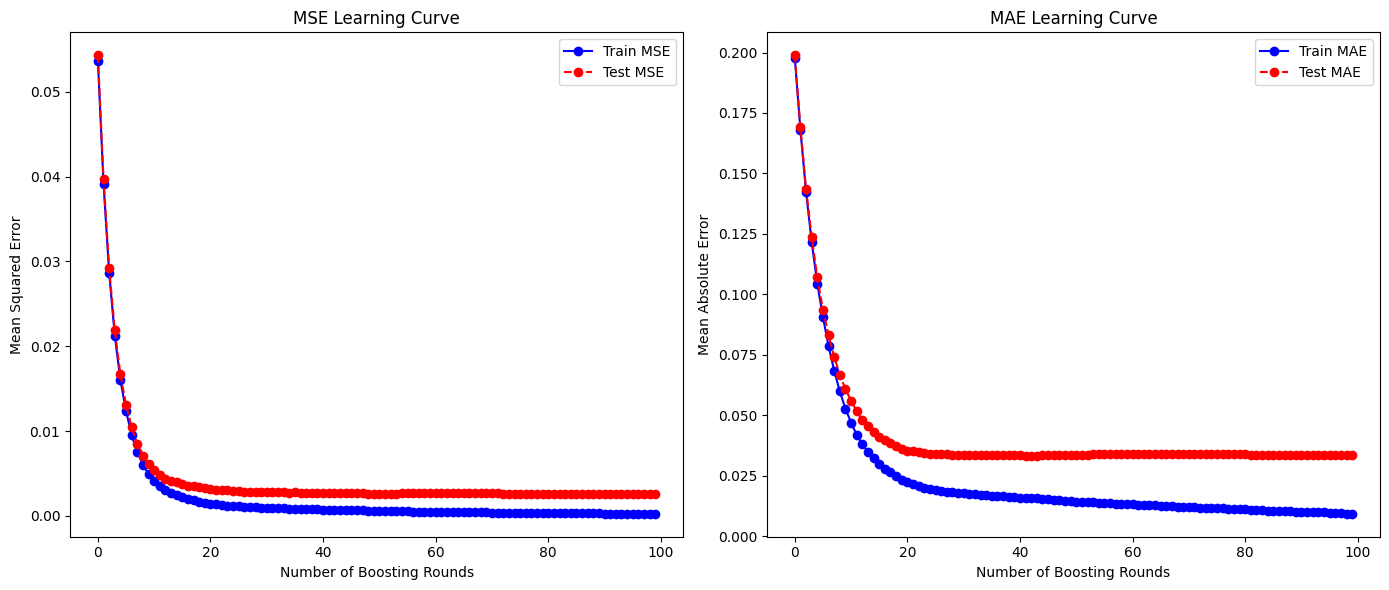

In [99]:
# Extract learning curve data
results = best_xgb_model.evals_result()
train_rmse = results["validation_0"]["rmse"]
test_rmse = results["validation_1"]["rmse"]

# Initialize lists to store MAE and MSE values
train_mae = []
test_mae = []
train_mse = []
test_mse = []

# Loop through each boosting round to calculate MAE and MSE at each step
for i in range(1, len(train_rmse) + 1):
    y_pred_train = best_xgb_model.predict(X_train, iteration_range=(0, i))
    y_pred_test = best_xgb_model.predict(X_test, iteration_range=(0, i))
    
    # Calculate MAE and MSE for train and test sets at the current boosting round
    train_mae.append(mean_absolute_error(y_train, y_pred_train))
    test_mae.append(mean_absolute_error(y_test, y_pred_test))
    train_mse.append(mean_squared_error(y_train, y_pred_train))
    test_mse.append(mean_squared_error(y_test, y_pred_test))

# Plot the learning curves
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# MSE Learning Curve
ax[0].plot(train_mse, label="Train MSE", marker="o", color="blue")
ax[0].plot(test_mse, label="Test MSE", marker="o", color="red", linestyle="--")
ax[0].set_title("MSE Learning Curve")
ax[0].set_xlabel("Number of Boosting Rounds")
ax[0].set_ylabel("Mean Squared Error")
ax[0].legend()

# MAE Learning Curve
ax[1].plot(train_mae, label="Train MAE", marker="o", color="blue")
ax[1].plot(test_mae, label="Test MAE", marker="o", color="red", linestyle="--")
ax[1].set_title("MAE Learning Curve")
ax[1].set_xlabel("Number of Boosting Rounds")
ax[1].set_ylabel("Mean Absolute Error")
ax[1].legend()

# Plotting options
plt.tight_layout()
plt.show()

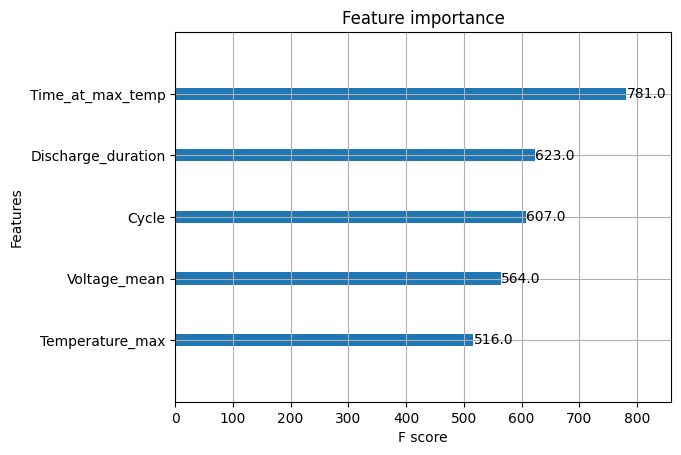

In [100]:
xgb.plot_importance(best_xgb_model)
plt.show()

Initial Data:
   Cycle  Voltage_mean  Temperature_max  Time_at_max_temp  Discharge_duration  \
0    145        0.6436           0.5278            0.0885            2964.750   
1     92        0.6100           0.5862            0.6411            2458.812   
2     95        0.1031           0.8080            0.4584            2392.375   
3    162        0.5896           0.7745            0.4920            3037.875   
4     39        0.6111           0.7656            0.5275            2491.375   

   Actual SOH  Predicted SOH  
0      0.1231         0.0970  
1      0.3744         0.3451  
2      0.1782         0.0566  
3      0.4869         0.5496  
4      0.3438         0.3618  


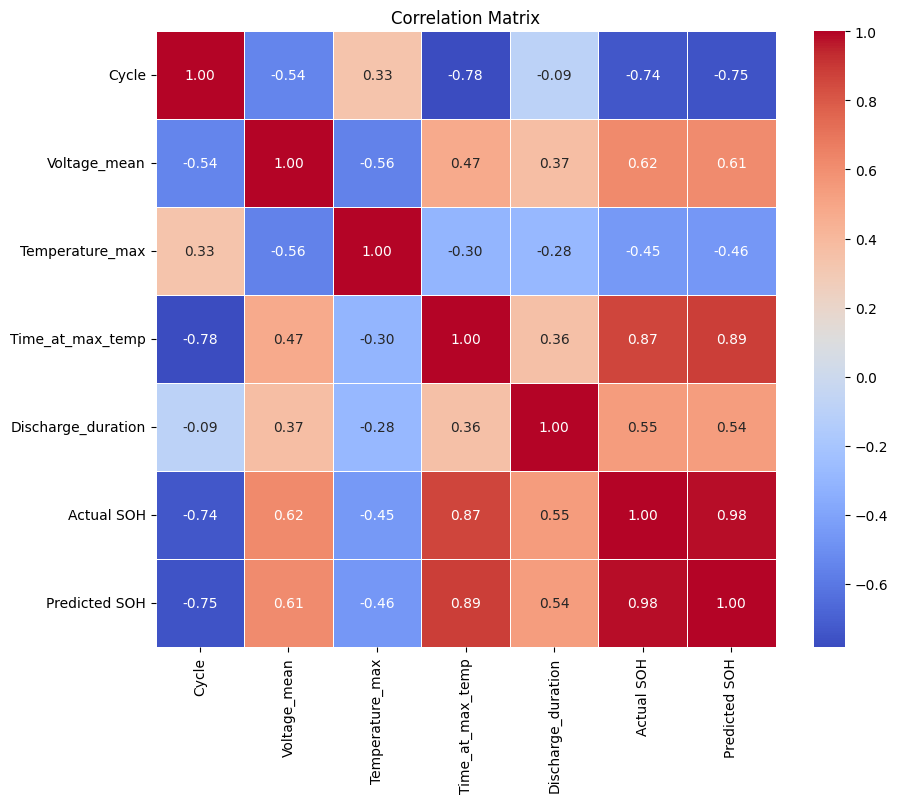

In [146]:
import seaborn as sns

file_path = r'C:\Users\hp\Documents\FYP_V0.2\cleaned_discharge\test_soh_predictions.csv'

try:
    data = pd.read_csv(file_path)
    print("Initial Data:")
    print(data.head())

    # Filter out rows with NA in "Actual SOH" and "Predicted SOH"
    filtered_data = data.dropna(subset=["Actual SOH", "Predicted SOH"])

    correlation_matrix = filtered_data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

**# Hyperparameter Tuning, cv = 5**

In [101]:
param_space = {
    'learning_rate': Real(0.01, 0.2, prior='uniform'),  # Learning rate
    'max_depth': Integer(3, 10),                          # Max depth of trees
    'subsample': Real(0.5, 1.0, prior='uniform'),         # Fraction of samples used for fitting
    'colsample_bytree': Real(0.5, 1.0, prior='uniform'),  # Fraction of features used for fitting
    'gamma': Real(0, 0.02, prior='uniform'),                 # Regularization term
    'max_leaves': Integer(10, 100),                         # Max number of leaves
    'min_child_weight': Integer(0, 10, prior='uniform')    # Minimum sum of instance weight needed in a child
}

xgb_model = xgb.XGBRegressor()   
bayes_search_xgb = BayesSearchCV(xgb_model, param_space, n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42)
bayes_search_xgb .fit(X_train, y_train, eval_set=[(X_test, y_test)])

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5,
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                             'learning_rate': Real(low=0.01, high=0.2, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'max_leaves': Integer(low=10, high=100, prior='uniform', transform='normalize'),
                             'min_child_weight': Integer(low=0, high=10, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')},
              verbose=2)

In [102]:
# Get the best hyperparameters
best_params = bayes_search_xgb.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: OrderedDict([('colsample_bytree', 0.8360313121189742), ('gamma', 0.0), ('learning_rate', 0.06904455169769205), ('max_depth', 10), ('max_leaves', 76), ('min_child_weight', 6), ('subsample', 0.721124387322816)])


In [103]:
eval_set = [(X_train, y_train), (X_test, y_test)] 

best_xgb_model = xgb.XGBRegressor(**bayes_search_xgb .best_params_, random_state=42)
best_xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

y_pred_xgb = best_xgb_model.predict(X_test)

In [104]:
mae_best_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_best_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_best_xgb = root_mean_squared_error(y_test, y_pred_xgb)

print(f'MAE: {mae_best_xgb:.6f}')
print(f'MSE: {mse_best_xgb:.6f}')
print(f'RMSE: {rmse_best_xgb:.6f}')

MAE: 0.033370
MSE: 0.002617
RMSE: 0.051158


In [105]:
y_test_flat = y_test.values.flatten()
y_pred_xgb_flat = y_pred_xgb.flatten()

# Create a DataFrame to hold actual and predicted values
results_xgb = pd.DataFrame({'Actual SOH': y_test_flat, 'Predicted SOH': y_pred_xgb_flat.round(4)})

# Print the actual and predicted SOH values
print(results_xgb)

     Actual SOH  Predicted SOH
0        0.1231         0.1370
1        0.3744         0.4052
2        0.1782         0.0459
3        0.4869         0.5040
4        0.3438         0.3755
..          ...            ...
246      0.7323         0.7657
247      0.2741         0.2290
248      0.2306         0.2205
249      0.1856         0.2185
250      0.2840         0.2560

[251 rows x 2 columns]


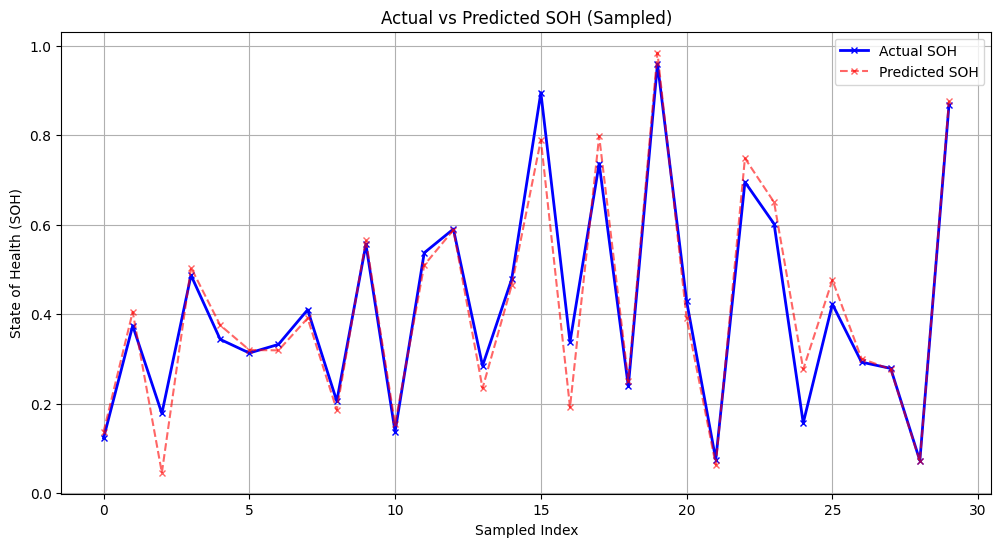

In [106]:
# Sample data for clearer visualization if the dataset is large
sample_size = 30  # adjust sample size as needed
y_test_sample = y_test[:sample_size]
y_pred_sample = y_pred_xgb[:sample_size]

# Plot actual and predicted SOH with transparency and markers
plt.figure(figsize=(12, 6))
plt.plot(y_test_sample.values, label='Actual SOH', color='blue',marker='x', markersize=5, linewidth=2)
plt.plot(y_pred_sample, label='Predicted SOH', color='red', linestyle='--', marker='x', markersize=5, alpha=0.6)
plt.title('Actual vs Predicted SOH (Sampled)')
plt.xlabel('Sampled Index')
plt.ylabel('State of Health (SOH)')
plt.legend()
plt.grid(True)
plt.show()

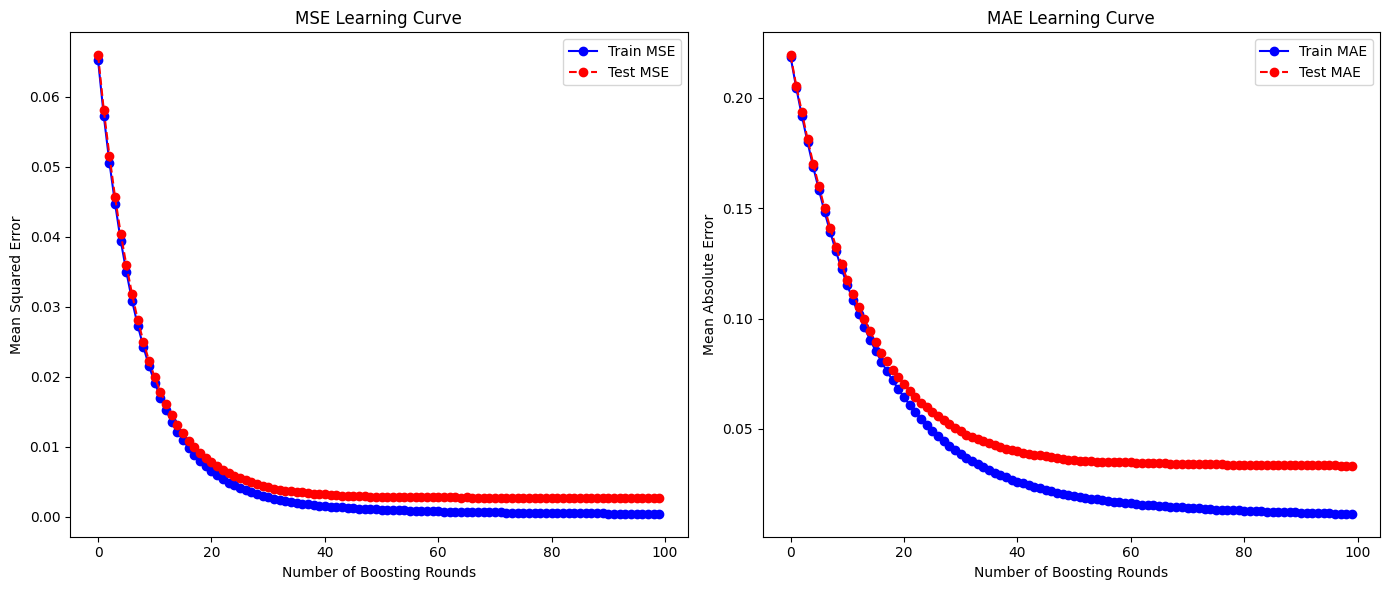

In [107]:
# Extract learning curve data
results = best_xgb_model.evals_result()
train_rmse = results["validation_0"]["rmse"]
test_rmse = results["validation_1"]["rmse"]

# Initialize lists to store MAE and MSE values
train_mae = []
test_mae = []
train_mse = []
test_mse = []

# Loop through each boosting round to calculate MAE and MSE at each step
for i in range(1, len(train_rmse) + 1):
    y_pred_train = best_xgb_model.predict(X_train, iteration_range=(0, i))
    y_pred_test = best_xgb_model.predict(X_test, iteration_range=(0, i))
    
    # Calculate MAE and MSE for train and test sets at the current boosting round
    train_mae.append(mean_absolute_error(y_train, y_pred_train))
    test_mae.append(mean_absolute_error(y_test, y_pred_test))
    train_mse.append(mean_squared_error(y_train, y_pred_train))
    test_mse.append(mean_squared_error(y_test, y_pred_test))

# Plot the learning curves
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# MSE Learning Curve
ax[0].plot(train_mse, label="Train MSE", marker="o", color="blue")
ax[0].plot(test_mse, label="Test MSE", marker="o", color="red", linestyle="--")
ax[0].set_title("MSE Learning Curve")
ax[0].set_xlabel("Number of Boosting Rounds")
ax[0].set_ylabel("Mean Squared Error")
ax[0].legend()

# MAE Learning Curve
ax[1].plot(train_mae, label="Train MAE", marker="o", color="blue")
ax[1].plot(test_mae, label="Test MAE", marker="o", color="red", linestyle="--")
ax[1].set_title("MAE Learning Curve")
ax[1].set_xlabel("Number of Boosting Rounds")
ax[1].set_ylabel("Mean Absolute Error")
ax[1].legend()

# Plotting options
plt.tight_layout()
plt.show()

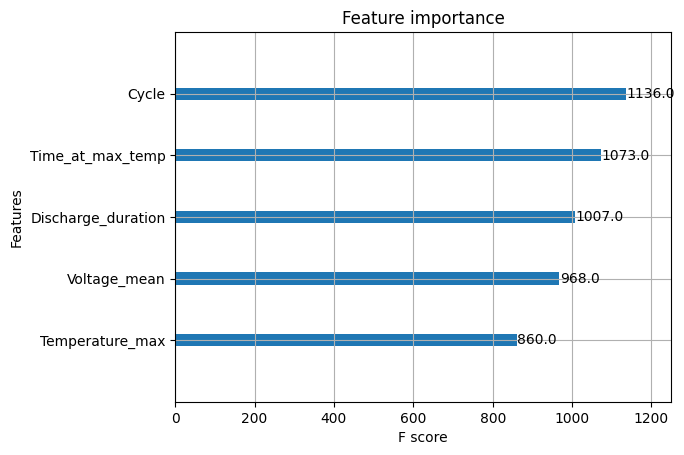

In [108]:
xgb.plot_importance(best_xgb_model)
plt.show()